# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
# import tabula
import PyPDF2
import re
from pandas import json_normalize 
import requests

import urllib
import json
import itertools

import matplotlib.pyplot as plt


from collections import Counter
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Fixed Parameters

In [2]:
PATH = "Data"
TRAIN_ARCHIVE = "/train/"
CSV1 = "train1.csv"
CSV2 = "train2.csv"

TEST_ARCHIVE = "/test/"
TEST = "test_x.csv"

# Loadind data

### CSVs

In [3]:
df_train_csv1 = pd.read_csv(PATH+TRAIN_ARCHIVE+CSV1, sep= ",", header='infer')
df_train_csv1

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,...,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Germany,Mineral industry,Installations for the production of cement cli...,https://registry.gdi-de.org/id/de.ni.mu/062217...,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,...,EUROPE,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f
1,Italy,Mineral industry,Installations for the production of cement cli...,IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,...,EUROPE,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963
2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,...,EUROPE,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada
3,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,...,EUROPE,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/Productio...,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...",Tampere,AIR,Methane (CH4),2018,12,...,EUROPE,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18558,Finland,Energy sector,Thermal power stations and other combustion in...,http://paikkatiedot.fi/so/1002031/pf/Productio...,"Kainuun Voima Oy, Kajaanin Höyryvoimalaitos",Kajaani,AIR,Nitrogen oxides (NOX),2017,12,...,EUROPE,17.173104,18.165618,19.206412,12.180394,11.345370,13.765315,1,Cheryl Walker,daf6f012401242ec2edbb6664665aec1
18559,Spain,Paper and wood production and processing,Industrial plants for the production of paper ...,ES.CAED/001767000.FACILITY,"SMURFIT NAVARRA, S.A.-SANGÜESA",SANGUESA,AIR,Nitrogen oxides (NOX),2014,2,...,EUROPE,17.311122,19.381145,23.264591,5.390422,5.023346,7.512245,0,Dr. Kelly Stevens,32a88ade353bf6ab80d92adcdc9fc597
18560,Sweden,Energy sector,Thermal power stations and other combustion in...,SE.CAED/10018242.Facility,Åkerslund,Ängelholm,AIR,Carbon dioxide (CO2),2007,12,...,EUROPE,20.809501,19.884620,23.599190,5.441425,7.972029,10.933081,0,Susan Webster,48b66e1acf3029708edc2d68314d1cd2
18561,United Kingdom,Energy sector,Thermal power stations and other combustion in...,GB.EEA/13819.FACILITY,Teesside Crude Oil Stabalisation Terminal,Middlesbrough,AIR,Carbon dioxide (CO2),2012,6,...,EUROPE,11.186522,15.233248,21.058308,16.023482,16.286381,17.303344,5,Cole Greene,b4cb58c3a936665786359c2c634d6ff4


In [4]:
df_train_csv2 = pd.read_csv(PATH+TRAIN_ARCHIVE+CSV2, sep= ";", header='infer')
df_train_csv2

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,...,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Germany,Waste and wastewater management,Installations for the incineration of non-haza...,https://registry.gdi-de.org/id/de.hh/pf.bube-e...,MVR Müllverwertung Rugenberger Damm GmbH & Co. KG,Hamburg,AIR,Nitrogen oxides (NOX),2012,4,...,EUROPE,13.006440,17.328013,22.819874,13.642167,13.524782,15.210716,0,Teresa Martin,35d7df6ed3d93be2927d14acc5f1fc9a
1,France,Energy sector,Thermal power stations and other combustion in...,FR.EEA/6288.FACILITY,SOCIETE DE COGENERATION,TAVAUX,AIR,Nitrogen oxides (NOX),2007,3,...,EUROPE,12.601338,16.415961,20.870744,12.425496,11.640683,14.170232,1,Teresa Monroe,8079579bf1d5379ea893be33dbb997d5
2,France,Energy sector,Thermal power stations and other combustion in...,FR.CAED/12066.FACILITY,CPCU ST-OUEN III,SAINT-OUEN,AIR,Carbon dioxide (CO2),2008,11,...,EUROPE,17.051488,18.558361,22.729832,10.676109,12.530537,14.036677,1,Brian Johnson,38fde98415bd374755bb341af3241c4f
3,Germany,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,https://registry.gdi-de.org/id/de.nw.inspire.p...,Deponie Haus Forst REMONDIS GmbH Rheinland,Kerpen,AIR,Methane (CH4),2009,2,...,EUROPE,9.345776,14.584978,22.153539,1.158088,1.424305,4.768707,1,David Jackson,8b73a54f4cb8ff07dd3e956bfa42b196
4,Estonia,Energy sector,Installations for gasification and liquefaction,EE.KAUR.TTR/76.FACILITY,"Enefit Energiatootmine AS, Auvere põlevkiviõli...","Auvere küla, Narva-Jõesuu linn",AIR,Carbon dioxide (CO2),2016,7,...,EUROPE,17.122838,18.382589,20.621925,8.620337,8.336314,12.852514,0,Holly Graves,cffe5169a23e2951963dc5e5da3fcd97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18559,United Kingdom,Paper and wood production and processing,Industrial plants for the production of paper ...,UK.SEPA/200000218.Facility,"Egger (UK) Ltd, Barony Rd, Ayr",Cumnock,AIR,Nitrogen oxides (NOX),2007,7,...,EUROPE,12.972697,15.703894,23.054179,13.769423,13.898824,16.315857,3,Matthew Norman,b6ca640b7121ae2bf206ea088f6a4618
18560,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U427/CZ34594641.FACILITY,Teplárna Trmice,Trmice,AIR,Carbon dioxide (CO2),2020,7,...,EUROPE,9.938614,15.537484,18.433252,15.422341,17.371004,18.625890,2,Casey Macdonald,f11ad352e6e30502ba26e97b96916316
18561,Netherlands,Chemical industry,Chemical installations for the production on a...,NL.EEA/6322.FACILITY,Air Products Nederland BV (Pernis),Vondelingenplaat Rotterdam,AIR,Nitrogen oxides (NOX),2008,5,...,EUROPE,12.919380,16.680595,19.082165,13.045298,15.043109,18.692182,0,Brent Campbell,bc7b2edb6795119deceede27628f9f90
18562,Germany,Mineral industry,"Installations for the manufacture of glass, in...",https://registry.gdi-de.org/id/de.ni.mu/072362...,Ardagh Glass GmbH Werk Obernkirchen,Obernkirchen,AIR,Carbon dioxide (CO2),2008,11,...,EUROPE,11.508290,15.439616,23.106673,1.972343,1.958249,5.721142,0,Kenneth Ramirez,f9cf308cd2723f2cc3f6edc3f79bb6f7


In [5]:
# Merging both csv dataframes:

df_train_csv = df_train_csv1.append(df_train_csv2)
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37127 entries, 0 to 18563
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   countryName                   37127 non-null  object 
 1   eprtrSectorName               37127 non-null  object 
 2   EPRTRAnnexIMainActivityLabel  37127 non-null  object 
 3   FacilityInspireID             37127 non-null  object 
 4   facilityName                  37127 non-null  object 
 5   City                          37127 non-null  object 
 6   targetRelease                 37127 non-null  object 
 7   pollutant                     37127 non-null  object 
 8   reportingYear                 37127 non-null  int64  
 9   MONTH                         37127 non-null  int64  
 10  DAY                           37127 non-null  int64  
 11  CONTINENT                     37127 non-null  object 
 12  max_wind_speed                37127 non-null  float64
 13  a

In [6]:
print(df_train_csv['EPRTRAnnexIMainActivityLabel'].nunique())
print(df_train_csv["eprtrSectorName"].nunique())
print(df_train_csv["pollutant"].nunique())
print(df_train_csv["targetRelease"].nunique())

70
9
3
1


### JSONs

In [7]:
# JSON 1

r = requests.get('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/first')
j = r.json()
df_json1 = pd.DataFrame.from_dict(j)
df_json1.head()

,,CITY ID,CONTINENT,City,DAY,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,EPRTRSectorCode,FacilityInspireID,...,countryName,eprtrSectorName,facilityName,max_temp,max_wind_speed,min_temp,min_wind_speed,pollutant,reportingYear,targetRelease
0,47068,4c325d62c064477ef17b4c6e4437e121,EUROPE,Europoort Rotterdam,2,1,4(a),Chemical installations for the production on a...,4,NL.RIVM/000019070.FACILITY,...,Netherlands,Chemical industry,Indorama Ventures Europe BV,13.256816011792559,11.019328717116156,14.696895445152332,20.899761591708206,Carbon dioxide (CO2),2020,AIR
1,32952,f5e609e7095f91cc8ce9ed6d8e774a0d,EUROPE,RION,3,2,3(c),Installations for the production of cement cli...,3,EL.CAED/100075.FACILITY,...,Greece,Mineral industry,TITAN CEMENT S.A. - DREPANO PLANT,4.528859186447803,14.5123950384412,9.219003402711184,23.243402867192145,Nitrogen oxides (NOX),2019,AIR
2,72375,cfab1ba8c67c7c838db98d666f02a132,EUROPE,--,1,12,1(c),Thermal power stations and other combustion in...,1,UK.CAED/BEISOffsh-Cormorant-Alpha.FACILITY,...,United Kingdom,Energy sector,Cormorant Alpha,10.669132597893881,20.26217117993502,14.715465115792192,23.956529199327292,Nitrogen oxides (NOX),2009,AIR
3,40702,95b4e51f7b662598134e1eb956407c74,EUROPE,DRIZZONA,17,1,7(a),Installations for the intensive rearing of pou...,7,IT.CAED/260342003.FACILITY,...,Italy,Intensive livestock production and aquaculture,SOCIETA' AGRICOLA SPARAVALLE DI FERRARI GIUSEP...,7.095681595088376,18.28354666681811,13.582024001859644,26.69626609353847,Methane (CH4),2014,AIR
4,29884,f4433be3b1bfaeeb0633eb65d04b1325,EUROPE,Lünen,6,0,5(a),Installations for the recovery or disposal of ...,5,https://registry.gdi-de.org/id/de.nw.inspire.p...,...,Germany,Waste and wastewater management,Biomassekraftwerk Lünen GmbH,9.886774464050356,13.75940846376134,14.00622637509683,24.768932565830674,Carbon dioxide (CO2),2015,AIR


In [8]:
# JSON 2

r = requests.get('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/second')
j = r.json()
df_json2 = pd.DataFrame.from_dict(j)
df_json2.head()

,,CITY ID,CONTINENT,City,DAY,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,EPRTRSectorCode,FacilityInspireID,...,countryName,eprtrSectorName,facilityName,max_temp,max_wind_speed,min_temp,min_wind_speed,pollutant,reportingYear,targetRelease
0,66841,e8d4668a35daa00b7802cdaac2b33bab,EUROPE,SIGTUNA,18,0,1(c),Thermal power stations and other combustion in...,1,SE.CAED/10014262.Facility,...,Sweden,Energy sector,BRISTAVERKET,12.910353536727893,19.591151655794587,17.82215864414945,24.496400860946892,Carbon dioxide (CO2),2010,AIR
1,43952,3a9c3ae8ea2e275700947e511afca943,EUROPE,Kaunas,3,1,1(c),Thermal power stations and other combustion in...,1,LT.EEA/3.FACILITY,...,Lithuania,Energy sector,Kauno elektrine,1.5666540044051371,9.00653292177714,4.398769749133166,20.07497599357037,Carbon dioxide (CO2),2015,AIR
2,77831,3d7694a841fc5d426287f208f5e04f61,EUROPE,WORKINGTON,20,10,6(b),Industrial plants for the production of paper ...,6,UK.CAED/EW_EA-1427.FACILITY,...,United Kingdom,Paper and wood production and processing,Workington Board Mill,10.241998731492398,14.076642626320474,13.447854103400092,25.23915141001326,Nitrogen oxides (NOX),2015,AIR
3,67548,f8a4753cdbccbd64f0411a207e071aac,EUROPE,SALA,5,2,5(d),Landfills (excluding landfills of inert waste ...,5,SE.CAED/10021261.Facility,...,Sweden,Waste and wastewater management,Isätra avfallsanläggning,12.684850988473203,18.924086287110967,17.3771676621797,25.603714335587156,Methane (CH4),2013,AIR
4,67772,ce2ddff460389bd5d9f1152dc5679d20,EUROPE,Lugnvik,26,1,1(c),Thermal power stations and other combustion in...,1,SE.CAED/10023054.Facility,...,Sweden,Energy sector,Lugnviksverket,7.826782397332164,18.59685701250554,11.731918192932916,25.811989344026774,Carbon dioxide (CO2),2014,AIR


In [9]:
# JSON 3

r = requests.get('http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/third')
j = r.json()
df_json3 = pd.DataFrame.from_dict(j)
df_json3.head()

,,CITY ID,CONTINENT,City,DAY,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,EPRTRSectorCode,FacilityInspireID,...,countryName,eprtrSectorName,facilityName,max_temp,max_wind_speed,min_temp,min_wind_speed,pollutant,reportingYear,targetRelease
0,41175,7951666b94e0f0891e0c66b2381fca55,EUROPE,TORINO,24,1,1(c),Thermal power stations and other combustion in...,1,IT.CAED/101511001.FACILITY,...,Italy,Energy sector,Iren Energia S.p.A.,7.367005114195391,15.892428799653784,12.571580007378364,20.467596329992563,Nitrogen oxides (NOX),2015,AIR
1,49299,33c89df2492e8d3efda719c849b530ea,EUROPE,Łódź,4,0,1(c),Thermal power stations and other combustion in...,1,PL.EEA/1321.FACILITY,...,Poland,Energy sector,Dalkia Łódź S.A. Elektrociepłownia nr 3,12.764269296496483,14.168741633729171,19.08124839205317,25.43951546576332,Carbon dioxide (CO2),2011,AIR
2,34879,4a8b9d98f65af3a29bbf298d8536c142,EUROPE,Tipperary,18,0,7(a)(ii),Installations for the intensive rearing of pig...,7,IE.CAED/P0489.FACILITY,...,Ireland,Intensive livestock production and aquaculture,Glen of Aherlow Pig Producers Co-Op Society Li...,9.278434915324674,17.849097696179154,15.912359661973477,25.603903622689426,Methane (CH4),2011,AIR
3,16905,e38f45f4d669e9f69fa97bfe049ceed6,EUROPE,REIMS,27,0,3(e),"Installations for the manufacture of glass, in...",3,FR.CAED/3453.FACILITY,...,France,Mineral industry,OI MANUFACTURING FRANCE REIMS,12.132209572093492,10.348395479695537,16.897353302304076,18.13168786166006,Nitrogen oxides (NOX),2014,AIR
4,75675,fb960490e42477cbfdcd6bab1793f31e,EUROPE,Hexham,28,2,6(b),Industrial plants for the production of paper ...,6,UK.LAED/E375_434.FACILITY,...,United Kingdom,Paper and wood production and processing,EGGER (UK) LIMITED,3.376109181863636,13.803120487487323,6.435357697393915,22.21506578438592,Nitrogen oxides (NOX),2012,AIR


In [10]:
# Merging the JSON csv dataframes:

df_train_json = df_json1.append(df_json2)
df_train_json = df_train_json.append(df_json3)
df_train_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 9500
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0                                 28501 non-null  object
 1   CITY ID                       28501 non-null  object
 2   CONTINENT                     28501 non-null  object
 3   City                          28501 non-null  object
 4   DAY                           28501 non-null  object
 5   DAY WITH FOGS                 28501 non-null  object
 6   EPRTRAnnexIMainActivityCode   28501 non-null  object
 7   EPRTRAnnexIMainActivityLabel  28501 non-null  object
 8   EPRTRSectorCode               28501 non-null  object
 9   FacilityInspireID             28501 non-null  object
 10  MONTH                         28501 non-null  object
 11  REPORTER NAME                 28501 non-null  object
 12  avg_temp                      28501 non-null  object
 13  avg_wind_speed   

In [11]:
print(df_train_json['EPRTRAnnexIMainActivityLabel'].nunique())
print(df_train_json["eprtrSectorName"].nunique())
print(df_train_json["pollutant"].nunique())
print(df_train_json["targetRelease"].nunique())

70
9
3
1


### PDFs

I cannot use java because of bad configurations in my computer. That´s why I am trying to retrieve the data with an unorthodox way

In [12]:
## TEST - DOESN´T WORK IN MY CASE - JAVA DOESN¨T GET DETECTED

## Read PDF into list of DataFrame
# dataframe = tabula.read_pdf('Data\\train6\pdfs-1.pdf', pages='all')

## Convert PDF into CSV file
# tabula.convert_into("Data\train6\pdfs-1.pdf", "Data\train6\pdfs-1.csv", output_format="csv", pages='all')

In [13]:
### USING IT AS TEST

# pdfFileObj = open('Data\\train6\pdfs-1.pdf', 'rb')
# pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
# print(pdfReader.numPages)
# pageObj = pdfReader.getPage(0)
# page = pageObj.extractText()
# print(page)


# page1 = re.sub("(?<= ) +", "@@@@" ,page)
# page1 = re.sub("(?<= ) ", "" ,page1)
# page1 = page1.replace(" ", "")
# page1 = page1.replace("@@@@", " ")
# print(page1)


In [14]:
path = os.getcwd()
pdf_files = glob.glob(os.path.join(PATH+TRAIN_ARCHIVE, "*.pdf"))
pdf_files

['Data/train\\pdfs-1.pdf',
 'Data/train\\pdfs81515.pdf',
 'Data/train\\pdfs81516.pdf',
 'Data/train\\pdfs81517.pdf',
 'Data/train\\pdfs81518.pdf',
 'Data/train\\pdfs81519.pdf',
 'Data/train\\pdfs81520.pdf',
 'Data/train\\pdfs81521.pdf',
 'Data/train\\pdfs81522.pdf',
 'Data/train\\pdfs81523.pdf',
 'Data/train\\pdfs81524.pdf',
 'Data/train\\pdfs81525.pdf',
 'Data/train\\pdfs81526.pdf',
 'Data/train\\pdfs81527.pdf',
 'Data/train\\pdfs81528.pdf',
 'Data/train\\pdfs81529.pdf',
 'Data/train\\pdfs81530.pdf',
 'Data/train\\pdfs81531.pdf',
 'Data/train\\pdfs81532.pdf',
 'Data/train\\pdfs81533.pdf',
 'Data/train\\pdfs81534.pdf',
 'Data/train\\pdfs81535.pdf',
 'Data/train\\pdfs81536.pdf',
 'Data/train\\pdfs81537.pdf',
 'Data/train\\pdfs81538.pdf',
 'Data/train\\pdfs81539.pdf',
 'Data/train\\pdfs81540.pdf',
 'Data/train\\pdfs81541.pdf',
 'Data/train\\pdfs81542.pdf',
 'Data/train\\pdfs81543.pdf',
 'Data/train\\pdfs81544.pdf',
 'Data/train\\pdfs81545.pdf',
 'Data/train\\pdfs81546.pdf',
 'Data/train\

In [15]:
all_pdf = []  

# loop over the list of csv files
for f in pdf_files:
    list_aux = []
    pdfFileObj = open(f, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    # a page object
    pageObj = pdfReader.getPage(0)
    # extracting text from page. this will save the text into String
    page = pageObj.extractText()
    page = re.sub("(?<= ) +", "@@@@" ,page)
    page = re.sub("(?<= ) ", "" ,page)
    page = page.replace(" ", "")
    page = page.replace("@@@@", " ")
    page = page.replace('\n',' ; ')
    page = page.replace(": ; ", " : ")
    page = page.replace("CONTAMINACIÓN ; nº", "CONTAMINACIÓN nº")
    list_aux.append(page)
    all_pdf.append(list_aux)

In [16]:
all_pdf

[['REPORT CONTAMINACIÓN nº : 81597 ; FACILITYNAME : MillerhillRecycling& EnergyRecovery Centre ; FacilityInspireID : UK.SEPA/200002651.Facility ; COUNTRY : UnitedKingdom ; CONTINENT : EUROPE ; CITY : Millerhill,Dalkeith ; EPRTRSectorCode : 5 ; eprtrSectorName : Waste andwastewatermanagement ; MainActivityCode : 5(b) ; targetRealase : AIR ; pollutant : Nitrogenoxides(NOX) ; emissions : 175000 ; DAY : 12 ; MONTH : 6 ; YEAR : 2019 ; METEOROLOGICAL CONDITIONS ; max_wind_speed : 1,79E+15 ; min_wind_speed : 2,2E+16 ; avg_wind_speed : 2,04E+15 ; max_temp : 1,51E+16 ; min_temp : 1,82E+15 ; avg_temp : 1,71E+16 ; DAYSFOG : 10 ; REPORTER NAME : WilliamNelson ; CITY_ID ; c662b4b4d859a9c224b5ac0acf221748 ; '],
 ['REPORT CONTAMINACIÓN nº : 81516 ; FACILITYNAME : FifeEthylenePlant ; 81516 ; FacilityInspireID : UK.SEPA/200000061.Facility ; COUNTRY : UnitedKingdom ; CONTINENT : EUROPE ; CITY : Cowdenbeath ; EPRTRSectorCode : 1 ; eprtrSectorName : Energy sector ; MainActivityCode : 1(c) ; targetRealase 

In [17]:
df_pdf = pd.DataFrame(all_pdf,columns = ['Original'])
df_pdf = df_pdf.iloc[1: , :]                              # deleting the first record because it was causing overlapping
                                                      # avoiding to add the missing value in order not to "pollute the data"

df_pdf

,Original
1,REPORT CONTAMINACIÓN nº : 81516 ; FACILITYNAME...
2,REPORT CONTAMINACIÓN nº : 81516 ; FACILITYNAME...
3,REPORT CONTAMINACIÓN nº : 81517 ; FACILITYNAME...
4,REPORT CONTAMINACIÓN nº : 81518 ; FACILITYNAME...
5,REPORT CONTAMINACIÓN nº : 81519 ; FACILITYNAME...
...,...
77,REPORT CONTAMINACIÓN nº : 81592 ; FACILITYNAME...
78,REPORT CONTAMINACIÓN nº : 81593 ; FACILITYNAME...
79,REPORT CONTAMINACIÓN nº : 81594 ; FACILITYNAME...
80,REPORT CONTAMINACIÓN nº : 81595 ; FACILITYNAME...


In [18]:
pd.set_option("max_columns", None)                  #Show all columns
pd.set_option("max_rows", None)                     #Show all records
pd.set_option('display.max_colwidth', None)         #Show entirevalues of cells

In [19]:
df_pdf = df_pdf.join(df_pdf['Original'].str.split(';', expand=True).add_prefix('Original').fillna(np.nan))
df_pdf = df_pdf.drop(['Original','Original16','Original25','Original27'], 1)
df_pdf

,Original0,Original1,Original2,Original3,Original4,Original5,Original6,Original7,Original8,Original9,Original10,Original11,Original12,Original13,Original14,Original15,Original17,Original18,Original19,Original20,Original21,Original22,Original23,Original24,Original26
1,REPORT CONTAMINACIÓN nº : 81516,FACILITYNAME : FifeEthylenePlant,81516,FacilityInspireID : UK.SEPA/200000061.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Cowdenbeath,EPRTRSectorCode : 1,eprtrSectorName : Energy sector,MainActivityCode : 1(c),targetRealase : AIR,pollutant : Carbondioxide(CO2),"emissions : 6,8E+08",DAY : 12,MONTH : 4,YEAR : 2019,"max_wind_speed : 1,52E+16","min_wind_speed : 2,06E+15","avg_wind_speed : 1,46E+16","max_temp : 9,61E+15","min_temp : 1,33E+16","avg_temp : 8,69E+15",DAYSFOG : 19,REPORTER NAME : ShawnGraham,3c563ab0d76fc84128574b5da82f769a
2,REPORT CONTAMINACIÓN nº : 81516,FACILITYNAME : FifeEthylenePlant,81517,FacilityInspireID : UK.SEPA/200000061.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Cowdenbeath,EPRTRSectorCode : 1,eprtrSectorName : Energy sector,MainActivityCode : 1(c),targetRealase : AIR,pollutant : Carbondioxide(CO2),"emissions : 6,8E+08",DAY : 12,MONTH : 4,YEAR : 2019,"max_wind_speed : 1,52E+16","min_wind_speed : 2,06E+15","avg_wind_speed : 1,46E+16","max_temp : 9,61E+15","min_temp : 1,33E+16","avg_temp : 8,69E+15",DAYSFOG : 19,REPORTER NAME : ShawnGraham,3c563ab0d76fc84128574b5da82f769a
3,REPORT CONTAMINACIÓN nº : 81517,FACILITYNAME : FifeEthylenePlant,81518,FacilityInspireID : UK.SEPA/200000061.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Cowdenbeath,EPRTRSectorCode : 1,eprtrSectorName : Energy sector,MainActivityCode : 1(c),targetRealase : AIR,pollutant : Nitrogenoxides(NOX),emissions : 633000,DAY : 3,MONTH : 1,YEAR : 2019,"max_wind_speed : 1,16E+16","min_wind_speed : 2,18E+16","avg_wind_speed : 1,65E+16","max_temp : 8,03E+15","min_temp : 1,04E+16","avg_temp : 8,94E+15",DAYSFOG : 10,REPORTER NAME : AaronJohnson,3c563ab0d76fc84128574b5da82f769a
4,REPORT CONTAMINACIÓN nº : 81518,FACILITYNAME : AlloaGlassFactory,81519,FacilityInspireID : UK.SEPA/200000073.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Alloa,EPRTRSectorCode : 3,eprtrSectorName : Mineralindustry,MainActivityCode : 3(e),targetRealase : AIR,pollutant : Carbondioxide(CO2),"emissions : 1,49E+08",DAY : 9,MONTH : 11,YEAR : 2019,"max_wind_speed : 1,11E+16","min_wind_speed : 2,03E+16","avg_wind_speed : 1,6E+16","max_temp : -1,9E+16","min_temp : 4,07E+16","avg_temp : 1,33E+15",DAYSFOG : 4,REPORTER NAME : VickiBrown,2cc8f54182c37b8907f534011ea01e6f
5,REPORT CONTAMINACIÓN nº : 81519,FACILITYNAME : AlloaGlassFactory,81520,FacilityInspireID : UK.SEPA/200000073.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Alloa,EPRTRSectorCode : 3,eprtrSectorName : Mineralindustry,MainActivityCode : 3(e),targetRealase : AIR,pollutant : Nitrogenoxides(NOX),emissions : 990000,DAY : 28,MONTH : 9,YEAR : 2019,"max_wind_speed : 1,74E+16","min_wind_speed : 2,23E+15","avg_wind_speed : 1,89E+16","max_temp : 5,82E+14","min_temp : 9,39E+15","avg_temp : 6,09E+15",DAYSFOG : 12,REPORTER NAME : LanceHart,2cc8f54182c37b8907f534011ea01e6f
6,REPORT CONTAMINACIÓN nº : 81520,"FACILITYNAME : RestennethLandfillSite,Forfar",81521,FacilityInspireID : UK.SEPA/200000081.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Forfar,EPRTRSectorCode : 5,eprtrSectorName : Waste andwastewatermanagement,MainActivityCode : 5(d),targetRealase : AIR,pollutant : Methane(CH4),emissions : 694000,DAY : 20,MONTH : 8,YEAR : 2019,"max_wind_speed : 1,2E+16","min_wind_speed : 2,35E+16","avg_wind_speed : 1,61E+16","max_temp : 6,3E+15","min_temp : 1,28E+16","avg_temp : 8,42E+14",DAYSFOG : 3,REPORTER NAME : TimothyWilliams,f66f865a6e8c90a9bcafc9def2e701f5
7,REPORT CONTAMINACIÓN nº : 81521,FACILITYNAME : AuchenloshLandfillSite,81522,FacilityInspireID : UK.SEPA/200000082.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Dalbeattie,EPRTRSectorCode : 5,eprtrSector

In [20]:
col_names = ['REPORT CONTAMINACIÓN nº', 'FACILITYNAME', 'REPORT CONTAMINACIÓN nº - Extra', 'FacilityInspireID', 'COUNTRY', 'CONTINENT', 'CITY',
             'EPRTRSectorCode', 'eprtrSectorName', 'MainActivityCode', 'targetRealase', 'pollutant', 'emissions',
             'DAY', 'MONTH', 'YEAR', 'max_wind_speed', 'min_wind_speed','avg_wind_speed', 'max_temp','min_temp', 'avg_temp', 'DAYSFOG', 'REPORTER NAME', 'CITY_ID']

df_pdf.columns = col_names
df_pdf

,REPORT CONTAMINACIÓN nº,FACILITYNAME,REPORT CONTAMINACIÓN nº - Extra,FacilityInspireID,COUNTRY,CONTINENT,CITY,EPRTRSectorCode,eprtrSectorName,MainActivityCode,targetRealase,pollutant,emissions,DAY,MONTH,YEAR,max_wind_speed,min_wind_speed,avg_wind_speed,max_temp,min_temp,avg_temp,DAYSFOG,REPORTER NAME,CITY_ID
1,REPORT CONTAMINACIÓN nº : 81516,FACILITYNAME : FifeEthylenePlant,81516,FacilityInspireID : UK.SEPA/200000061.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Cowdenbeath,EPRTRSectorCode : 1,eprtrSectorName : Energy sector,MainActivityCode : 1(c),targetRealase : AIR,pollutant : Carbondioxide(CO2),"emissions : 6,8E+08",DAY : 12,MONTH : 4,YEAR : 2019,"max_wind_speed : 1,52E+16","min_wind_speed : 2,06E+15","avg_wind_speed : 1,46E+16","max_temp : 9,61E+15","min_temp : 1,33E+16","avg_temp : 8,69E+15",DAYSFOG : 19,REPORTER NAME : ShawnGraham,3c563ab0d76fc84128574b5da82f769a
2,REPORT CONTAMINACIÓN nº : 81516,FACILITYNAME : FifeEthylenePlant,81517,FacilityInspireID : UK.SEPA/200000061.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Cowdenbeath,EPRTRSectorCode : 1,eprtrSectorName : Energy sector,MainActivityCode : 1(c),targetRealase : AIR,pollutant : Carbondioxide(CO2),"emissions : 6,8E+08",DAY : 12,MONTH : 4,YEAR : 2019,"max_wind_speed : 1,52E+16","min_wind_speed : 2,06E+15","avg_wind_speed : 1,46E+16","max_temp : 9,61E+15","min_temp : 1,33E+16","avg_temp : 8,69E+15",DAYSFOG : 19,REPORTER NAME : ShawnGraham,3c563ab0d76fc84128574b5da82f769a
3,REPORT CONTAMINACIÓN nº : 81517,FACILITYNAME : FifeEthylenePlant,81518,FacilityInspireID : UK.SEPA/200000061.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Cowdenbeath,EPRTRSectorCode : 1,eprtrSectorName : Energy sector,MainActivityCode : 1(c),targetRealase : AIR,pollutant : Nitrogenoxides(NOX),emissions : 633000,DAY : 3,MONTH : 1,YEAR : 2019,"max_wind_speed : 1,16E+16","min_wind_speed : 2,18E+16","avg_wind_speed : 1,65E+16","max_temp : 8,03E+15","min_temp : 1,04E+16","avg_temp : 8,94E+15",DAYSFOG : 10,REPORTER NAME : AaronJohnson,3c563ab0d76fc84128574b5da82f769a
4,REPORT CONTAMINACIÓN nº : 81518,FACILITYNAME : AlloaGlassFactory,81519,FacilityInspireID : UK.SEPA/200000073.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Alloa,EPRTRSectorCode : 3,eprtrSectorName : Mineralindustry,MainActivityCode : 3(e),targetRealase : AIR,pollutant : Carbondioxide(CO2),"emissions : 1,49E+08",DAY : 9,MONTH : 11,YEAR : 2019,"max_wind_speed : 1,11E+16","min_wind_speed : 2,03E+16","avg_wind_speed : 1,6E+16","max_temp : -1,9E+16","min_temp : 4,07E+16","avg_temp : 1,33E+15",DAYSFOG : 4,REPORTER NAME : VickiBrown,2cc8f54182c37b8907f534011ea01e6f
5,REPORT CONTAMINACIÓN nº : 81519,FACILITYNAME : AlloaGlassFactory,81520,FacilityInspireID : UK.SEPA/200000073.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Alloa,EPRTRSectorCode : 3,eprtrSectorName : Mineralindustry,MainActivityCode : 3(e),targetRealase : AIR,pollutant : Nitrogenoxides(NOX),emissions : 990000,DAY : 28,MONTH : 9,YEAR : 2019,"max_wind_speed : 1,74E+16","min_wind_speed : 2,23E+15","avg_wind_speed : 1,89E+16","max_temp : 5,82E+14","min_temp : 9,39E+15","avg_temp : 6,09E+15",DAYSFOG : 12,REPORTER NAME : LanceHart,2cc8f54182c37b8907f534011ea01e6f
6,REPORT CONTAMINACIÓN nº : 81520,"FACILITYNAME : RestennethLandfillSite,Forfar",81521,FacilityInspireID : UK.SEPA/200000081.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY : Forfar,EPRTRSectorCode : 5,eprtrSectorName : Waste andwastewatermanagement,MainActivityCode : 5(d),targetRealase : AIR,pollutant : Methane(CH4),emissions : 694000,DAY : 20,MONTH : 8,YEAR : 2019,"max_wind_speed : 1,2E+16","min_wind_speed : 2,35E+16","avg_wind_speed : 1,61E+16","max_temp : 6,3E+15","min_temp : 1,28E+16","avg_temp : 8,42E+14",DAYSFOG : 3,REPORTER NAME : TimothyWilliams,f66f865a6e8c90a9bcafc9def2e701f5
7,REPORT CONTAMINACIÓN nº : 81521,FACILITYNAME : AuchenloshLandfillSite,81522,FacilityInspireID : UK.SEPA/200000082.Facility,COUNTRY : UnitedKingdom,CONTINENT : EUROPE,CITY

In [21]:
for col in col_names:
    df_pdf[col] = df_pdf[col].str.replace(col+" : ", '')      # cleaning the attribute from the records

In [22]:
df_pdf

,REPORT CONTAMINACIÓN nº,FACILITYNAME,REPORT CONTAMINACIÓN nº - Extra,FacilityInspireID,COUNTRY,CONTINENT,CITY,EPRTRSectorCode,eprtrSectorName,MainActivityCode,targetRealase,pollutant,emissions,DAY,MONTH,YEAR,max_wind_speed,min_wind_speed,avg_wind_speed,max_temp,min_temp,avg_temp,DAYSFOG,REPORTER NAME,CITY_ID
1,81516,FifeEthylenePlant,81516,UK.SEPA/200000061.Facility,UnitedKingdom,EUROPE,Cowdenbeath,1,Energy sector,1(c),AIR,Carbondioxide(CO2),"6,8E+08",12,4,2019,"1,52E+16","2,06E+15","1,46E+16","9,61E+15","1,33E+16","8,69E+15",19,ShawnGraham,3c563ab0d76fc84128574b5da82f769a
2,81516,FifeEthylenePlant,81517,UK.SEPA/200000061.Facility,UnitedKingdom,EUROPE,Cowdenbeath,1,Energy sector,1(c),AIR,Carbondioxide(CO2),"6,8E+08",12,4,2019,"1,52E+16","2,06E+15","1,46E+16","9,61E+15","1,33E+16","8,69E+15",19,ShawnGraham,3c563ab0d76fc84128574b5da82f769a
3,81517,FifeEthylenePlant,81518,UK.SEPA/200000061.Facility,UnitedKingdom,EUROPE,Cowdenbeath,1,Energy sector,1(c),AIR,Nitrogenoxides(NOX),633000,3,1,2019,"1,16E+16","2,18E+16","1,65E+16","8,03E+15","1,04E+16","8,94E+15",10,AaronJohnson,3c563ab0d76fc84128574b5da82f769a
4,81518,AlloaGlassFactory,81519,UK.SEPA/200000073.Facility,UnitedKingdom,EUROPE,Alloa,3,Mineralindustry,3(e),AIR,Carbondioxide(CO2),"1,49E+08",9,11,2019,"1,11E+16","2,03E+16","1,6E+16","-1,9E+16","4,07E+16","1,33E+15",4,VickiBrown,2cc8f54182c37b8907f534011ea01e6f
5,81519,AlloaGlassFactory,81520,UK.SEPA/200000073.Facility,UnitedKingdom,EUROPE,Alloa,3,Mineralindustry,3(e),AIR,Nitrogenoxides(NOX),990000,28,9,2019,"1,74E+16","2,23E+15","1,89E+16","5,82E+14","9,39E+15","6,09E+15",12,LanceHart,2cc8f54182c37b8907f534011ea01e6f
6,81520,"RestennethLandfillSite,Forfar",81521,UK.SEPA/200000081.Facility,UnitedKingdom,EUROPE,Forfar,5,Waste andwastewatermanagement,5(d),AIR,Methane(CH4),694000,20,8,2019,"1,2E+16","2,35E+16","1,61E+16","6,3E+15","1,28E+16","8,42E+14",3,TimothyWilliams,f66f865a6e8c90a9bcafc9def2e701f5
7,81521,AuchenloshLandfillSite,81522,UK.SEPA/200000082.Facility,UnitedKingdom,EUROPE,Dalbeattie,5,Waste andwastewatermanagement,5(d),AIR,Methane(CH4),101000,15,4,2019,"1,46E+16","1,7E+16","1,47E+16","9,74E+15","1,1E+16","9,23E+15",2,BrianSims,d52bec466f0edb76a6fc14c109598ba2
8,81522,"AuchencarrochLandfill,Jamestown",81523,UK.SEPA/200000083.Facility,UnitedKingdom,EUROPE,Alexandria,5,Waste andwastewatermanagement,5(d),AIR,Methane(CH4),1300000,9,11,2019,"1,69E+16","2,07E+16","1,79E+15","5,38E+15","1,18E+15","7,29E+15",12,Tracy Powell,a6bc8f85a33112c5beea4d357caad4cd
9,81523,"GarlaffLandfillSite,Cumnock",81524,UK.SEPA/200000084.Facility,UnitedKingdom,EUROPE,Cumnock,5,Waste andwastewatermanagement,5(d),AIR,Methane(CH4),999000,20,11,2019,"1,49E+15","2,37E+16","2,04E+16","1,58E+16","8,9E+15","4,32E+14",11,RebeccaBrooks,b6ca640b7121ae2bf206ea088f6a4618
10,81524,BinnFarm LandfillSite,81525,UK.SEPA/200000085.Facility,UnitedKingdom,EUROPE,Glenfarg,5,Waste andwastewatermanagement,5(d),AIR,Methane(CH4),196000,7,6,2019,"2,15E+15","2,78E+16","2,08E+16","1,22E+15","1,58E+16","1,22E+14",8,Tammy Williams,930b3f6a2b01ab9967c61d939efce973


In [23]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 1 to 81
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   REPORT CONTAMINACIÓN nº          81 non-null     object
 1   FACILITYNAME                     81 non-null     object
 2   REPORT CONTAMINACIÓN nº - Extra  81 non-null     object
 3   FacilityInspireID                81 non-null     object
 4   COUNTRY                          81 non-null     object
 5   CONTINENT                        81 non-null     object
 6   CITY                             81 non-null     object
 7   EPRTRSectorCode                  81 non-null     object
 8   eprtrSectorName                  81 non-null     object
 9   MainActivityCode                 81 non-null     object
 10  targetRealase                    81 non-null     object
 11  pollutant                        81 non-null     object
 12  emissions                        81 no

In [24]:
#print(df_pdf['EPRTRAnnexIMainActivityLabel'].nunique())
print(df_pdf["eprtrSectorName"].nunique())
print(df_pdf["pollutant"].nunique())
print(df_pdf["targetRealase"].nunique())

5
3
1


## Merging CSV and JSON dataframes, since they have the most records

#### CSV

In [25]:
df_train_csv.head()

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Germany,Mineral industry,Installations for the production of cement clinker in rotary kilns,https://registry.gdi-de.org/id/de.ni.mu/06221720040,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,20,EUROPE,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f
1,Italy,Mineral industry,"Installations for the production of cement clinker in rotary kilns, lime in rotary kilns, cement or lime in other furnaces. Note to reporters, use Level 3 activity e.g. 3(c)(i), in preference to 3(c). Level 2 activity class (i.e. 3(c)) only to be used where Level 3 is not available.",IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,21,EUROPE,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963
2,Spain,Waste and wastewater management,"Landfills (excluding landfills of inert waste and landfills, which were definitely closed before 16.7.2001 or for which the after-care phase required by the competent authorities according to Article 13 of Council Directive 1999/31/EC of 26 April 1999 on the landfill of waste has expired)",ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,4,EUROPE,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada
3,Czechia,Energy sector,Thermal power stations and other combustion installations,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,6,EUROPE,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/ProductionFacility/0000000928.ProductionFacility,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄTEVEDENPUHDISTAMO",Tampere,AIR,Methane (CH4),2018,12,22,EUROPE,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a


In [26]:
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37127 entries, 0 to 18563
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   countryName                   37127 non-null  object 
 1   eprtrSectorName               37127 non-null  object 
 2   EPRTRAnnexIMainActivityLabel  37127 non-null  object 
 3   FacilityInspireID             37127 non-null  object 
 4   facilityName                  37127 non-null  object 
 5   City                          37127 non-null  object 
 6   targetRelease                 37127 non-null  object 
 7   pollutant                     37127 non-null  object 
 8   reportingYear                 37127 non-null  int64  
 9   MONTH                         37127 non-null  int64  
 10  DAY                           37127 non-null  int64  
 11  CONTINENT                     37127 non-null  object 
 12  max_wind_speed                37127 non-null  float64
 13  a

#### JSON

In [27]:
df_train_json.head()

,,CITY ID,CONTINENT,City,DAY,DAY WITH FOGS,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,EPRTRSectorCode,FacilityInspireID,MONTH,REPORTER NAME,avg_temp,avg_wind_speed,countryName,eprtrSectorName,facilityName,max_temp,max_wind_speed,min_temp,min_wind_speed,pollutant,reportingYear,targetRelease
0,47068,4c325d62c064477ef17b4c6e4437e121,EUROPE,Europoort Rotterdam,2,1,4(a),"Chemical installations for the production on an industrial scale of basic organic chemicals. Note to reporters, use Level 3 activity e.g. 4(a)(iii), in preference to 4(a). Level 2 activity class (i.e. 4(a)) only to be used where Level 3 is not available.",4,NL.RIVM/000019070.FACILITY,3,Peter Rogers,12.326234356831371,15.68645015581054,Netherlands,Chemical industry,Indorama Ventures Europe BV,13.256816011792559,11.019328717116156,14.696895445152332,20.899761591708206,Carbon dioxide (CO2),2020,AIR
1,32952,f5e609e7095f91cc8ce9ed6d8e774a0d,EUROPE,RION,3,2,3(c),"Installations for the production of cement clinker in rotary kilns, lime in rotary kilns, cement or lime in other furnaces. Note to reporters, use Level 3 activity e.g. 3(c)(i), in preference to 3(c). Level 2 activity class (i.e. 3(c)) only to be used where Level 3 is not available.",3,EL.CAED/100075.FACILITY,2,Thomas Gutierrez,5.114688475007264,18.396179670690906,Greece,Mineral industry,TITAN CEMENT S.A. - DREPANO PLANT,4.528859186447803,14.5123950384412,9.219003402711184,23.243402867192145,Nitrogen oxides (NOX),2019,AIR
2,72375,cfab1ba8c67c7c838db98d666f02a132,EUROPE,--,1,12,1(c),Thermal power stations and other combustion installations,1,UK.CAED/BEISOffsh-Cormorant-Alpha.FACILITY,9,Jon Figueroa,10.208837145825772,21.85621043510892,United Kingdom,Energy sector,Cormorant Alpha,10.669132597893881,20.26217117993502,14.715465115792192,23.956529199327292,Nitrogen oxides (NOX),2009,AIR
3,40702,95b4e51f7b662598134e1eb956407c74,EUROPE,DRIZZONA,17,1,7(a),"Installations for the intensive rearing of poultry or pigs. Note to reporters, use Level 3 activity e.g. 7(a)(ii), in preference to 7(a). Level 2 activity class (i.e. 7(a)) only to be used where Level 3 is not available.",7,IT.CAED/260342003.FACILITY,10,Vanessa Dorsey,9.50230163010951,19.195731394748613,Italy,Intensive livestock production and aquaculture,SOCIETA' AGRICOLA SPARAVALLE DI FERRARI GIUSEPPE E C. SOCIETA' SEMPLICE,7.095681595088376,18.28354666681811,13.582024001859644,26.69626609353847,Methane (CH4),2014,AIR
4,29884,f4433be3b1bfaeeb0633eb65d04b1325,EUROPE,Lünen,6,0,5(a),Installations for the recovery or disposal of hazardous waste,5,https://registry.gdi-de.org/id/de.nw.inspire.pf.bube-eureg/arb-2017-978024-900-9139128,9,Derrick Anderson,11.585549635691075,18.277089492642343,Germany,Waste and wastewater management,Biomassekraftwerk Lünen GmbH,9.886774464050356,13.75940846376134,14.00622637509683,24.768932565830674,Carbon dioxide (CO2),2015,AIR


In [28]:
df_train_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 9500
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0                                 28501 non-null  object
 1   CITY ID                       28501 non-null  object
 2   CONTINENT                     28501 non-null  object
 3   City                          28501 non-null  object
 4   DAY                           28501 non-null  object
 5   DAY WITH FOGS                 28501 non-null  object
 6   EPRTRAnnexIMainActivityCode   28501 non-null  object
 7   EPRTRAnnexIMainActivityLabel  28501 non-null  object
 8   EPRTRSectorCode               28501 non-null  object
 9   FacilityInspireID             28501 non-null  object
 10  MONTH                         28501 non-null  object
 11  REPORTER NAME                 28501 non-null  object
 12  avg_temp                      28501 non-null  object
 13  avg_wind_speed   

In [29]:
csv_col_list = df_train_csv.columns.values.tolist()
json_col_list = df_train_json.columns.values.tolist()

main_list = list(set(json_col_list) - set(csv_col_list))
main_list

['', 'EPRTRAnnexIMainActivityCode', 'EPRTRSectorCode']

In [30]:
df_train_json = df_train_json.drop(['', 'EPRTRAnnexIMainActivityCode', 'EPRTRSectorCode'], 1)

In [31]:
df_train= df_train_csv.append(df_train_json)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65628 entries, 0 to 9500
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   countryName                   65628 non-null  object
 1   eprtrSectorName               65628 non-null  object
 2   EPRTRAnnexIMainActivityLabel  65628 non-null  object
 3   FacilityInspireID             65628 non-null  object
 4   facilityName                  65628 non-null  object
 5   City                          65628 non-null  object
 6   targetRelease                 65628 non-null  object
 7   pollutant                     65628 non-null  object
 8   reportingYear                 65628 non-null  object
 9   MONTH                         65628 non-null  object
 10  DAY                           65628 non-null  object
 11  CONTINENT                     65628 non-null  object
 12  max_wind_speed                65628 non-null  object
 13  avg_wind_speed   

Here it was intended to add the data of the pdfs in the dataframe, however there were occuring lots of errors so it was decided to nor incorporate the data from the pdfs

In [32]:
# col_names = ['REPORT CONTAMINACIÓN nº', 'facilityName', 'REPORT CONTAMINACIÓN nº - Extra', 'FacilityInspireID', 'countryName', 'CONTINENT', 'City',
#              'EPRTRSectorCode', 'eprtrSectorName', 'MainActivityCode', 'targetRelease', 'pollutant', 'emissions',
#              'DAY', 'MONTH', 'reportingYear', 'max_wind_speed', 'min_wind_speed','avg_wind_speed', 'max_temp','min_temp', 'avg_temp', 'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID']

# df_pdf.columns = col_names
# df_pdf

In [33]:
# df_pdf.info()

In [34]:
# df_train_list = df_train.columns.values.tolist()
# df_pdf_list = df_pdf.columns.values.tolist()

# main_list = list(set(df_pdf_list) - set(df_train_list))
# main_list

In [35]:
# df_pdf = df_pdf.drop(['REPORT CONTAMINACIÓN nº', 'REPORT CONTAMINACIÓN nº - Extra', 'EPRTRSectorCode', 'emissions', 'MainActivityCode'], 1)

In [36]:
# df_pdf

In [37]:
# df_train['eprtrSectorName'].value_counts()

In [38]:
# correcting the values of specific columns that are not going to be dropped later

# df_pdf["countryName"] = df_pdf["countryName"].str.replace("UnitedKingdom", 'United Kingdom') 
# df_pdf["eprtrSectorName"] = df_pdf["eprtrSectorName"].str.replace("Mineralindustry", 'Mineral industry') 
# df_pdf["eprtrSectorName"] = df_pdf["eprtrSectorName"].str.replace("Waste andwastewatermanagement", 'Waste and wastewater management') 
# df_pdf["eprtrSectorName"] = df_pdf["eprtrSectorName"].str.replace("Paperandwoodproductionandprocessing", 'Paper and wood production and processing')
# df_pdf["eprtrSectorName"] = df_pdf["eprtrSectorName"].str.replace("Chemicalindustry	", 'Chemical industry')

# float_list = ["max_wind_speed", "avg_wind_speed", "min_wind_speed", "max_temp", "avg_temp", "min_temp"]

# for i in float_list:
    # df_pdf[i] = df_pdf[i].str.replace(",", '.') 
    #  df_pdf[i] = df_pdf[i].str.replace(" ", '')

In [39]:
# for i in df_pdf["max_wind_speed"]:
#     df_pdf["max_wind_speed"] = df_pdf["max_wind_speed"].astype(float(i))
    
# for i in df_pdf["avg_wind_speed"]:
#     df_pdf["avg_wind_speed"] = df_pdf["avg_wind_speed"].astype(float(i))
    
# for i in df_train["max_temp"]:
#     df_pdf["max_temp"] = df_pdf["max_temp"].astype(float(i))
    
# for i in df_pdf["avg_temp"]:
#     df_pdf["avg_temp"] = df_pdf["avg_temp"].astype(float(i))
    
# for i in df_pdf["min_wind_speed"]:
#     df_pdf["min_wind_speed"] = df_pdf["min_wind_speed"].astype(float(i))
    
# for i in df_pdf["min_temp"]:
#     df_pdf["min_temp"] = df_pdf["min_temp"].astype(float(i))

In [40]:
# df_train= df_train.append(df_pdf)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65628 entries, 0 to 9500
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   countryName                   65628 non-null  object
 1   eprtrSectorName               65628 non-null  object
 2   EPRTRAnnexIMainActivityLabel  65628 non-null  object
 3   FacilityInspireID             65628 non-null  object
 4   facilityName                  65628 non-null  object
 5   City                          65628 non-null  object
 6   targetRelease                 65628 non-null  object
 7   pollutant                     65628 non-null  object
 8   reportingYear                 65628 non-null  object
 9   MONTH                         65628 non-null  object
 10  DAY                           65628 non-null  object
 11  CONTINENT                     65628 non-null  object
 12  max_wind_speed                65628 non-null  object
 13  avg_wind_speed   

In [41]:
df_train.head()

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,Germany,Mineral industry,Installations for the production of cement clinker in rotary kilns,https://registry.gdi-de.org/id/de.ni.mu/06221720040,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,10,20,EUROPE,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f
1,Italy,Mineral industry,"Installations for the production of cement clinker in rotary kilns, lime in rotary kilns, cement or lime in other furnaces. Note to reporters, use Level 3 activity e.g. 3(c)(i), in preference to 3(c). Level 2 activity class (i.e. 3(c)) only to be used where Level 3 is not available.",IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,9,21,EUROPE,19.66155,19.368166,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963
2,Spain,Waste and wastewater management,"Landfills (excluding landfills of inert waste and landfills, which were definitely closed before 16.7.2001 or for which the after-care phase required by the competent authorities according to Article 13 of Council Directive 1999/31/EC of 26 April 1999 on the landfill of waste has expired)",ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,2,4,EUROPE,12.729453,14.701985,17.10393,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada
3,Czechia,Energy sector,Thermal power stations and other combustion installations,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,8,6,EUROPE,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2
4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/ProductionFacility/0000000928.ProductionFacility,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄTEVEDENPUHDISTAMO",Tampere,AIR,Methane (CH4),2018,12,22,EUROPE,17.11193,20.201604,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a


In [42]:
df_train = df_train.drop(['EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','CITY ID','targetRelease', 'CONTINENT', "REPORTER NAME"], 1)

In [43]:
df_train.head(50)

,countryName,eprtrSectorName,City,pollutant,reportingYear,MONTH,DAY,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS
0,Germany,Mineral industry,Sehnde,Carbon dioxide (CO2),2015,10,20,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2
1,Italy,Mineral industry,TAVERNOLA BERGAMASCA,Nitrogen oxides (NOX),2018,9,21,19.66155,19.368166,21.756389,5.462839,7.864403,12.023521,1
2,Spain,Waste and wastewater management,PUERTO DEL ROSARIO,Methane (CH4),2019,2,4,12.729453,14.701985,17.10393,1.511201,4.233438,8.632193,2
3,Czechia,Energy sector,Kadaň,Nitrogen oxides (NOX),2012,8,6,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0
4,Finland,Waste and wastewater management,Tampere,Methane (CH4),2018,12,22,17.11193,20.201604,21.536012,11.772039,11.344078,16.039004,2
5,Switzerland,Energy sector,Cressier,Nitrogen oxides (NOX),2009,11,26,13.610384,16.054021,18.476185,0.218463,1.69583,3.081757,2
6,France,Mineral industry,COGNAC,Carbon dioxide (CO2),2008,5,5,12.816569,15.940397,21.873807,10.954453,13.806014,16.682482,1
7,Poland,Paper and wood production and processing,Kostrzyn nad Odrą,Carbon dioxide (CO2),2011,4,11,9.143964,14.174349,19.879915,11.915887,12.930775,17.699905,2
8,United Kingdom,Energy sector,--,Carbon dioxide (CO2),2010,6,20,20.766119,21.205965,26.255209,6.348797,7.877442,11.130713,17
9,France,Chemical industry,GONFREVILLE-L'ORCHER,Carbon dioxide (CO2),2014,11,13,17.949222,20.947898,27.992034,9.633089,10.736422,12.305046,0


In [44]:
df_train.tail()

,countryName,eprtrSectorName,City,pollutant,reportingYear,MONTH,DAY,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS
9496,Cyprus,Energy sector,LARNAKA,Carbon dioxide (CO2),2008,1,1,13.475987983553544,18.55647637777159,22.85253008379323,13.34580070979159,12.41078296998785,17.148326520153717,0
9497,Finland,Energy sector,Naantali,Nitrogen oxides (NOX),2008,12,19,8.815938780886254,14.461702597343331,20.55378092877372,3.820281499959616,3.7638334614499307,5.657106835772357,0
9498,Slovenia,Waste and wastewater management,Ptuj,Methane (CH4),2010,8,10,14.793298049775357,16.688049243796055,20.411497765443265,17.28536462543226,18.34979774493633,21.538440790883374,2
9499,Italy,Mineral industry,VIGGIANO,Nitrogen oxides (NOX),2014,1,25,14.911317150406134,16.1440911999443,22.64719217689789,6.387198549855581,6.176237885779872,9.269075541047428,0
9500,United Kingdom,Energy sector,Runcorn,Carbon dioxide (CO2),2008,7,23,21.761811818975897,21.29694932226269,29.248275526843145,8.220677952512872,11.194307988687749,14.171779505100723,13


## Now that we have all the relevant info in one dataframe, we prepare it for our model

In [45]:
# the replacing values got obtained from the pdf_dataframe

df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace("Energy sector", 1) 
df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace("Production and processing of metals", 2) 
df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace('Mineral industry', 3) 
df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace('Chemical industry', 4)
df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace('Waste and wastewater management' , 5 ) 
df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace('Paper and wood production and processing', 6)
df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace('Intensive livestock production and aquaculture', 7)
df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace('Animal and vegetable products from the food and beverage sector', 8)
df_train["eprtrSectorName"] = df_train["eprtrSectorName"].replace('Other activities', 9)

In [46]:
df_train=df_train.rename(columns = {'eprtrSectorName':'EPRETRSectorCode'})

In [47]:
df_train.head()

,countryName,EPRETRSectorCode,City,pollutant,reportingYear,MONTH,DAY,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS
0,Germany,3,Sehnde,Carbon dioxide (CO2),2015,10,20,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2
1,Italy,3,TAVERNOLA BERGAMASCA,Nitrogen oxides (NOX),2018,9,21,19.66155,19.368166,21.756389,5.462839,7.864403,12.023521,1
2,Spain,5,PUERTO DEL ROSARIO,Methane (CH4),2019,2,4,12.729453,14.701985,17.10393,1.511201,4.233438,8.632193,2
3,Czechia,1,Kadaň,Nitrogen oxides (NOX),2012,8,6,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0
4,Finland,5,Tampere,Methane (CH4),2018,12,22,17.11193,20.201604,21.536012,11.772039,11.344078,16.039004,2


In [48]:
int_cols = ["reportingYear", "EPRETRSectorCode", "MONTH", "DAY", "DAY WITH FOGS"]

for i in int_cols:
    df_train[i] = df_train[i].astype(int)

float_cols = ["max_wind_speed", "avg_wind_speed", "min_wind_speed", "max_temp", "avg_temp", "min_temp"]

for i in float_cols:
    df_train[i] = df_train[i].astype(float)

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65628 entries, 0 to 9500
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   countryName       65628 non-null  object 
 1   EPRETRSectorCode  65628 non-null  int32  
 2   City              65628 non-null  object 
 3   pollutant         65628 non-null  object 
 4   reportingYear     65628 non-null  int32  
 5   MONTH             65628 non-null  int32  
 6   DAY               65628 non-null  int32  
 7   max_wind_speed    65628 non-null  float64
 8   avg_wind_speed    65628 non-null  float64
 9   min_wind_speed    65628 non-null  float64
 10  max_temp          65628 non-null  float64
 11  avg_temp          65628 non-null  float64
 12  min_temp          65628 non-null  float64
 13  DAY WITH FOGS     65628 non-null  int32  
dtypes: float64(6), int32(5), object(3)
memory usage: 6.3+ MB


In [50]:
d = df_train.duplicated().sum()
t = len(df_train.index)
percentage_duplicates = d/t * 100
print ("- Total entries:", t, " -Duplicated entries:", d, " - Percentage:", percentage_duplicates,"%")

- Total entries: 65628  -Duplicated entries: 8568  - Percentage: 13.055403181568842 %


In [51]:
# Taking into consideration that atributes as "max_wind_speed", "avg_wind_speed", "min_wind_speed", "max_temp", "avg_temp", "min_temp"
# have many decimals, it is considered that these duplicates are actually an error, so they will be eliminated

df_train=df_train.drop_duplicates(keep=False)


d = df_train.duplicated().sum()
t = len(df_train.index)
percentage_duplicates = d/t * 100
print ("- Total entries:", t, " -Duplicated entries:", d, " - Percentage:", percentage_duplicates,"%")

- Total entries: 49661  -Duplicated entries: 0  - Percentage: 0.0 %


In [52]:
df_train.head()

,countryName,EPRETRSectorCode,City,pollutant,reportingYear,MONTH,DAY,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS
0,Germany,3,Sehnde,Carbon dioxide (CO2),2015,10,20,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2
1,Italy,3,TAVERNOLA BERGAMASCA,Nitrogen oxides (NOX),2018,9,21,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1
2,Spain,5,PUERTO DEL ROSARIO,Methane (CH4),2019,2,4,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2
3,Czechia,1,Kadaň,Nitrogen oxides (NOX),2012,8,6,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0
4,Finland,5,Tampere,Methane (CH4),2018,12,22,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2


Text(0.5, 1.0, 'Correlacions between the atributes')

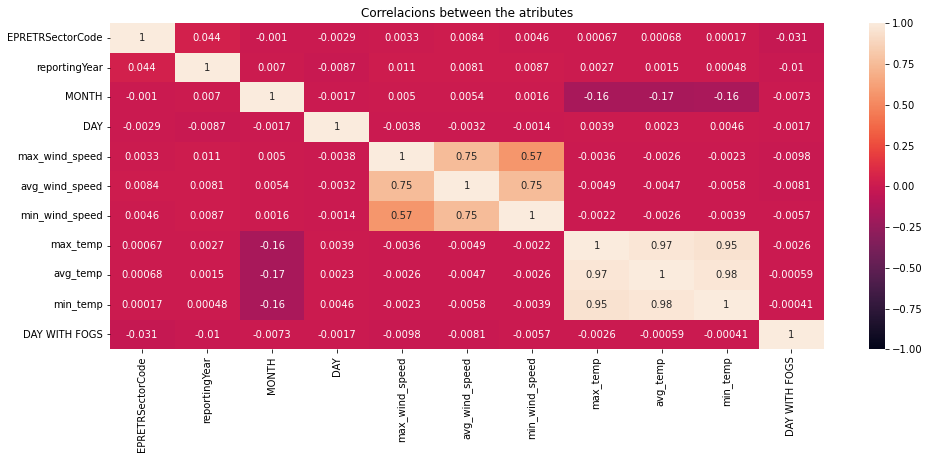

In [53]:
# Correlation Matrix

plt.figure(figsize=(16, 6))

ax = plt.axes()
heatmap_df_train= sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, ax = ax)
ax.set_title('Correlacions between the atributes')

In [54]:
df_train = df_train.drop(['avg_wind_speed',"max_temp", "min_temp"], 1)

Text(0.5, 1.0, 'New correlacions between the atributes after dropping columns')

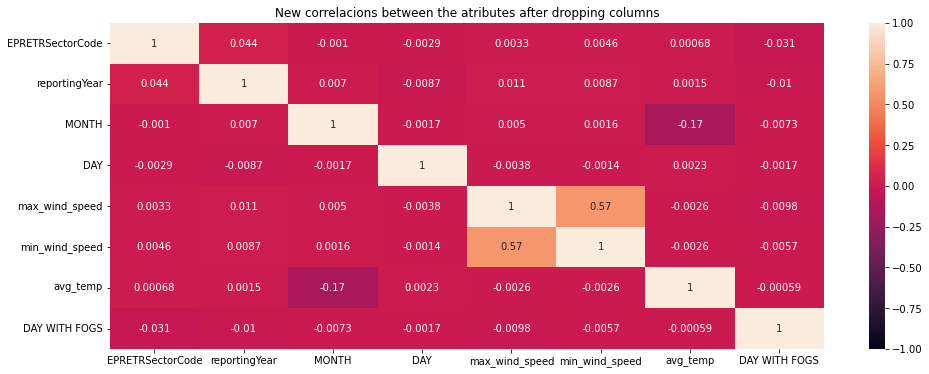

In [55]:
# New orrelation Matrix after dropping columns

plt.figure(figsize=(16, 6))

ax = plt.axes()
heatmap_df_train= sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, ax = ax)
ax.set_title('New correlacions between the atributes after dropping columns')

In [56]:
df_train['pollutant'].value_counts()

# this shows us that the classes are balanced

Nitrogen oxides (NOX)    19685
Carbon dioxide (CO2)     17446
Methane (CH4)            12530
Name: pollutant, dtype: int64

In [57]:
df_train['pollutant'] = df_train['pollutant'].replace("Nitrogen oxides (NOX)", "0")
df_train['pollutant'] = df_train['pollutant'].replace("Carbon dioxide (CO2)", "1")
df_train['pollutant'] = df_train['pollutant'].replace("Methane (CH4)", "2")

In [58]:
df_train.head()

,countryName,EPRETRSectorCode,City,pollutant,reportingYear,MONTH,DAY,max_wind_speed,min_wind_speed,avg_temp,DAY WITH FOGS
0,Germany,3,Sehnde,1,2015,10,20,15.118767,21.419106,4.924169,2
1,Italy,3,TAVERNOLA BERGAMASCA,0,2018,9,21,19.661550,21.756389,7.864403,1
2,Spain,5,PUERTO DEL ROSARIO,2,2019,2,4,12.729453,17.103930,4.233438,2
3,Czechia,1,Kadaň,0,2012,8,6,11.856417,17.537184,10.298348,0
4,Finland,5,Tampere,2,2018,12,22,17.111930,21.536012,11.344078,2


# Creating the model: Logistic Regression

### Dividing the data in Train & Test

In [59]:
target = df_train.pop('pollutant')

In [60]:
target.head()

0    1
1    0
2    2
3    0
4    2
Name: pollutant, dtype: object

In [61]:
# Convetring the dataframe in numpy array

#df_train_array = df_train.to_numpy()
#print(type(df_train_array))

In [62]:
# Normalizing the strings since the model needs numeric data:

le = preprocessing.LabelEncoder()
for column_name in df_train.columns:
    if df_train[column_name].dtype == object:
        df_train[column_name] = le.fit_transform(df_train[column_name])
    else:
        pass

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size=0.3, random_state=12)

In [108]:
print(X_train.shape)     # the shape of the independent variables

(34762, 10)


In [109]:
# Verifcating the quantity of records between train and test after the split:

print("Training Data:", Counter(y_train))
print("Testing Data:", Counter(y_test))

Training Data: Counter({'0': 13807, '1': 12217, '2': 8738})
Testing Data: Counter({'0': 5878, '1': 5229, '2': 3792})


In [110]:
# Scaling the data to the independent variables:

model_normalization = StandardScaler().fit(X_train)
features = model_normalization.transform(X_train)
features

array([[-1.18816759, -1.06340782,  1.13695653, ..., -0.37686372,
        -1.42007796, -0.32574874],
       [-1.81142688, -1.06340782,  1.60998975, ...,  1.22695457,
         1.51034636, -0.06044539],
       [-0.77266139,  1.37602456, -0.6240048 , ..., -0.74449036,
         1.77234363, -0.32574874],
       ...,
       [ 1.09711648, -0.08763486, -0.61516941, ..., -0.10206011,
         0.97625271, -0.06044539],
       [-0.87653794, -0.08763486, -0.4520545 , ...,  2.08856299,
         0.45835068, -0.59105209],
       [-0.77266139,  0.88813809,  0.21127944, ..., -0.96684523,
        -0.34394951, -0.06044539]])

##### Train

In [111]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression [_logistic.py:763]


LogisticRegression()

In [112]:
# Train score

lr1.score(X_train,y_train)

0.47563431333064843

##### Test

In [113]:
X_test_norm = model_normalization.transform(X_test)

In [114]:
# Applying the trained model:

test_predictions1 = lr1.predict(X_test_norm)
test_predictions1

array(['2', '2', '0', ..., '0', '2', '1'], dtype=object)

In [115]:
# Obtaining the probabilities according to which the model is classifying:

probability1 = lr1.predict_proba(X_test)
probability1

array([[0.25660364, 0.15955284, 0.58384352],
       [0.27692682, 0.23998181, 0.48309136],
       [0.49163646, 0.40094588, 0.10741766],
       ...,
       [0.45789416, 0.38997329, 0.15213255],
       [0.32054256, 0.26570278, 0.41375466],
       [0.47657126, 0.46620405, 0.05722469]])

##### Evaluation

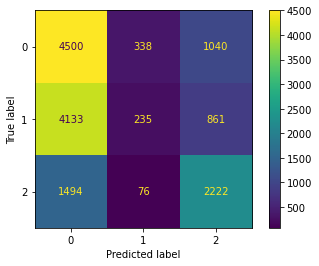

In [116]:
# Confusion Matrix:

CA1 = metrics.plot_confusion_matrix(lr1,X_test,y_test)

In [117]:
# Checking the goodness of the model

CR1 = classification_report(y_test, test_predictions1)

print ('\033[1m' + 'Classification Report: Logistic Regession','\033[0m')
print (' ')
print(CR1)

Classification Report: Logistic Regession 
 
              precision    recall  f1-score   support

           0       0.47      0.24      0.31      5878
           1       0.44      0.48      0.46      5229
           2       0.49      0.82      0.61      3792

    accuracy                           0.47     14899
   macro avg       0.47      0.51      0.46     14899
weighted avg       0.47      0.47      0.44     14899



In [118]:
# The weight of each atribute for the predictions:

coefs1=lr1.coef_
print(coefs1)
print(X_train.columns)

[[-9.66339265e-03 -1.73426376e-01 -2.97180673e-07  4.84689543e-04
   1.26671145e-02 -4.58460367e-04  1.06647218e-03 -1.31261524e-03
   8.45836383e-05 -9.65640712e-03]
 [-6.99697411e-03 -1.74040688e-01  4.02279549e-05  4.04274077e-04
   4.19106385e-03 -8.68717325e-04 -2.22277644e-04  8.85291816e-04
  -3.02487890e-03 -3.13156564e-02]
 [ 1.66603668e-02  3.47467064e-01 -3.99307743e-05 -8.88963619e-04
  -1.68581783e-02  1.32717769e-03 -8.44194538e-04  4.27323419e-04
   2.94029526e-03  4.09720635e-02]]
Index(['countryName', 'EPRETRSectorCode', 'City', 'reportingYear', 'MONTH',
       'DAY', 'max_wind_speed', 'min_wind_speed', 'avg_temp', 'DAY WITH FOGS'],
      dtype='object')


### Applying the model to the TEST data

In [119]:
df_test = pd.read_csv(PATH+TEST_ARCHIVE+TEST, sep= ",", header='infer')
df_test.head()

,test_index,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,reportingYear,MONTH,DAY,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,0,Poland,3,Mineral industry,3(a),Underground mining and related operations,PL.MŚ/000002357.FACILITY,Polska Grupa Górnicza sp. z o.o. Oddział KWK ROW Ruch Rydułtowy,Rydułtowy,AIR,2017,8,16,EUROPE,14.080054,14.855940,18.474836,10.278561,11.381181,13.480752,1,Brittany Buck,826b1de9dad293ae3e4f9cbaf6cf3420
1,1,Luxembourg,5,Waste and wastewater management,5(d),"Landfills (excluding landfills of inert waste and landfills, which were definitely closed before 16.7.2001 or for which the after-care phase required by the competent authorities according to Article 13 of Council Directive 1999/31/EC of 26 April 1999 on the landfill of waste has expired)",LU.CAED/000012000.FACILITY,Sidec,Diekirch,AIR,2008,11,22,EUROPE,16.052425,17.623877,22.622900,6.625910,8.840137,13.422924,0,Lauren Fisher,ed30a6667b40ba0a66198b3173e7353f
2,2,Netherlands,1,Energy sector,1(c),Thermal power stations and other combustion installations,NL.EEA/212857.FACILITY,Nuon Power Generation BV (Eemshaven),Eemshaven,AIR,2014,9,19,EUROPE,13.647318,15.541979,17.818521,5.669436,8.403322,11.276388,2,Linda Thompson,78e1082c3cfef3bdf3554da8d6afcc34
3,3,Sweden,5,Waste and wastewater management,5(d),"Landfills (excluding landfills of inert waste and landfills, which were definitely closed before 16.7.2001 or for which the after-care phase required by the competent authorities according to Article 13 of Council Directive 1999/31/EC of 26 April 1999 on the landfill of waste has expired)",SE.CAED/10013901.Facility,HÖGBYTORPS AVFALLSANLÄGGNING,BRO,AIR,2011,7,17,EUROPE,16.336762,17.458113,19.961777,6.160560,7.571596,9.443572,2,Bethany Mcmillan,27f959641950d381869d746d7d0e7d4e
4,4,Portugal,1,Energy sector,1(c),Thermal power stations and other combustion installations,PT.EEA/133926.FACILITY,"SPCG - Sociedade Portuguesa de Co-Geração Eléctrica, SA",SETÚBAL,AIR,2010,6,23,EUROPE,21.516602,20.532473,21.617137,10.964012,11.548033,12.624114,2,Sarah Hoffman,1cb71655d9e0bd5cedb2320bf5fdd8f7


We treat the dataset in order to make it correspond to the dataframe "train"

In [120]:
df_test = df_test.drop(["eprtrSectorName","EPRTRAnnexIMainActivityCode",'EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName', "targetRelease",'CITY ID','targetRelease', 'avg_wind_speed',"max_temp", "min_temp",'CONTINENT', "REPORTER NAME"], 1)

In [121]:
df_test.head()

,test_index,countryName,EPRTRSectorCode,City,reportingYear,MONTH,DAY,max_wind_speed,min_wind_speed,avg_temp,DAY WITH FOGS
0,0,Poland,3,Rydułtowy,2017,8,16,14.080054,18.474836,11.381181,1
1,1,Luxembourg,5,Diekirch,2008,11,22,16.052425,22.622900,8.840137,0
2,2,Netherlands,1,Eemshaven,2014,9,19,13.647318,17.818521,8.403322,2
3,3,Sweden,5,BRO,2011,7,17,16.336762,19.961777,7.571596,2
4,4,Portugal,1,SETÚBAL,2010,6,23,21.516602,21.617137,11.548033,2


In [122]:
df_test = df_test.set_index('test_index')

In [125]:
# Normalizing the strings since the model needs numeric data:

le = preprocessing.LabelEncoder()
for column_name in df_test.columns:
    if df_test[column_name].dtype == object:
        df_test[column_name] = le.fit_transform(df_test[column_name])
    else:
        pass

In [127]:
# Applying the model:


predictions=lr1.predict(df_test)
print (predictions)

['0' '2' '0' ... '0' '0' '2']


In [128]:
# Convert the array of the predictions in a list 
list_predictions = predictions.tolist()

In [130]:
# Creating dataframe df_results with the indexes and the predictions

df_results = pd.DataFrame (list_predictions, index=df_test.index, columns = ['pollutant'])
print(df_results.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24480 entries, 0 to 24479
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pollutant  24480 non-null  object
dtypes: object(1)
memory usage: 382.5+ KB
None


In [132]:
df_results.head() # visualizing the results

,pollutant
test_index,
0,0
1,2
2,0
3,2
4,0


### Creating the files with the predictions

In [133]:
# Save the last dataframe to .csv

df_results.to_csv("predictions.csv", index=True)

In [134]:
df_results.to_json('predictions.json')